In [2]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

### 10.2
#### (c)

In [22]:
# 100 samples (100 draws) for 2.5% quantiles and 97.5% quantiles
theta_2_5=[]
theta_97_5=[]
for i in range(1000):
    theta_2_5.append(np.percentile(np.random.normal(8,4,size=100),2.5))
    theta_97_5.append(np.percentile(np.random.normal(8,4,size=100),97.5))

In [38]:
#Function to get quantiles for 100draws
def sum_(x):
    percentile=np.percentile(x,[2.5,25,50,75,97.5]).tolist()
    sum_1=[np.mean(x),np.std(x)]
    sum_1.extend(percentile)
    quantile_final=DataFrame(sum_1,index=["mean","sd","2.5%","25%","50%","75%","97.5%"],columns=["info"]).T
    return quantile_final


In [39]:
sum_(theta_2_5)

,mean,sd,2.5%,25%,50%,75%,97.5%
info,0.471904,0.942568,-1.442003,-0.162299,0.505912,1.117857,2.294102


In [40]:
sum_(theta_97_5)

,mean,sd,2.5%,25%,50%,75%,97.5%
info,15.461391,0.980797,13.564373,14.806357,15.459311,16.088346,17.439045


#### (d)

In [41]:
#Tune the size until the standard deviation of each quantile turns to 0.1.
#We need 10000 samples (100 draws) for 2.5% quantiles and 97.5% quantiles

theta_2_5=[]
theta_97_5=[]
for i in range(1000):
    theta_2_5.append(np.percentile(np.random.normal(8,4,size=10000),2.5))
    theta_97_5.append(np.percentile(np.random.normal(8,4,size=10000),97.5))

In [45]:
sum_(theta_2_5)

,mean,sd,2.5%,25%,50%,75%,97.5%
info,0.16527,0.107826,-0.039509,0.091993,0.167172,0.242927,0.367923


In [46]:
sum_(theta_97_5)

,mean,sd,2.5%,25%,50%,75%,97.5%
info,15.836113,0.105367,15.647863,15.759864,15.836532,15.902476,16.04152


### 10.3
#### (a)

In [48]:
def exercise_10_3_a(alpha, beta, n_samples=1000):
    p1 = np.random.beta(alpha + 6, beta + 4, n_samples)
    p2 = np.random.beta(alpha + 10, beta + 10, n_samples)
    
    sub_samples = p1 - p2
    return sub_samples

samples = exercise_10_3_a(1, 1, 1000)
sum_(samples)


,mean,sd,2.5%,25%,50%,75%,97.5%
info,0.093049,0.169685,-0.250165,-0.025265,0.100278,0.215351,0.41684


In [51]:
print ('p(p1>p2):', np.sum(samples > 0) / 1000)

p(p1>p2): 0.71


#### (b)

In [55]:
#We need to use the scipy package to use integral 
#scipy.integrate.dblquad(func, a, b, gfun, hfun, args=(), epsabs=1.49e-08, epsrel=1.49e-08)

from scipy import integrate
def exercise_10_3_b(alpha, beta):
    beta_pdf= stats.beta.pdf
    return integrate.dblquad(lambda p2,p1:
                             beta_pdf(p1, alpha+6, beta+4)*beta_pdf(p2, alpha+10, beta+10),
                            0,1, lambda p1:0, lambda p1:p1)

exercise_10_3_b(1,1)

(0.6863834211926292, 6.9775735714831695e-09)

### 10.5

In [630]:
#a,b
alpha = np.random.standard_t(4)*2
beta = np.random.standard_t(4)

#x
J=10
x = np.random.uniform(0,1,J) #list format

#theta
theta = 1/(1+np.exp(-alpha - beta*x)) #list format

#n~pois(5)
from scipy.stats import poisson

n=[]
for i in range(10):
    r = poisson.rvs(5, size=1)[0]
    if (r <0):
        r = possion.rvs(5, size=1)[0]
        n.append(r)
    else:
        n.append(r)

#y~binom(n, theta)
y=[]
for i in range(10):
    v = np.random.binomial(n[i],theta[i])
    y.append(v)

In [631]:
alpha

5.2039464100260915

In [632]:
beta

0.7723887163095199

In [633]:
theta

array([0.9958909 , 0.99617187, 0.99498429, 0.99589473, 0.99589746,
       0.99590569, 0.9963099 , 0.99684732, 0.99674467, 0.99726308])

In [634]:
n

[5, 8, 6, 6, 2, 3, 5, 0, 5, 3]

In [635]:
y

[5, 8, 6, 6, 2, 3, 5, 0, 5, 3]

In [636]:
x

array([0.37091032, 0.46297401, 0.11160945, 0.37212388, 0.37298798,
       0.37559812, 0.51069851, 0.71517977, 0.67356477, 0.89881519])

In [637]:
#draw 1000 samples
#We can use for loop and while but
#Wanted to try different
#since this is rejection sampling, 
#we should consider the samples that are not rejected
#So increase the size to 20000

s = 20000
alpha = np.random.standard_t(4, size=(1, s))*2
beta = np.random.standard_t(4, size=(1, s))

n = np.array(n).reshape(-1,1)
y = np.array(y).reshape(-1,1)
x = x.reshape(-1,1)

theta = 1./(1. + np.exp(-alpha - beta*x))
nCy = comb(n, y)
acc_rate = np.prod(nCy * theta**y * (1 - theta)**(n-y), axis=0)
acc_rate /= acc_rate.max() #divide into maximum or acc.rate


In [638]:
unif = np.random.uniform(0, 1, size=s)
acc = (acc_rate >= unif)

In [639]:
unif = np.random.uniform(0, 1, size=s)
acc = (acc_rate >= unif) #if acc_rate is larger than unif

idx = np.nonzero(acc)[0] #0이 아닌 것의 Index 반환

a = np.sort(alpha.squeeze()[idx][:1000]) #slice til 1000
b = np.sort(beta.squeeze()[idx][:1000]) #slice til 1000

print ('average acceptance rate:', acc_rate.mean())
print ('posterior mode of alpha:', a.mean())
print ('posterior mode of beta:', b.mean())

average acceptance rate: 0.06268515726450642
posterior mode of alpha: 5.562911324383685
posterior mode of beta: 0.5426477972449537


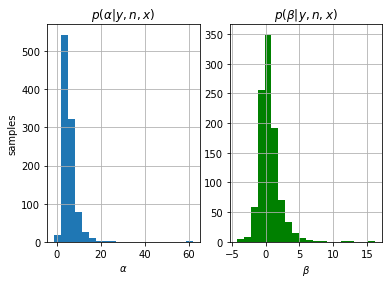

In [640]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(a, bins=20)

ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel('samples')
ax1.set_title(r'$p(\alpha|y, n, x)$')

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(b, bins=20, color='green')

ax2.set_xlabel(r'$\beta$')
ax2.set_title(r'$p(\beta|y, n, x)$')


In [616]:
#(c)
#get covariance matrix
k = np.vstack((a, b))
Cov_mat = np.cov(k)

#get mode
import statistics

a_mode, b_mode = a.mean(), b.mean()
print ('posterior mode:')
print (a_mode, b_mode)

print ('covariance matrix:', Cov_mat)


posterior mode:
0.13151455466117368 0.0034660275473345336
covariance matrix: [[0.19646121 0.3773043 ]
 [0.3773043  0.72681626]]


In [641]:
approx_norm =stats.multivariate_normal.pdf(
    x, [a_mode, b_mode], Cov_mat)

approx_norm

array([9.55227254e-01, 4.68974624e-03, 5.89993394e-02, 9.09920859e-01,
       8.78669204e-01, 7.89241633e-01, 8.11860229e-05, 9.90407644e-17,
       9.86653190e-14, 1.83402928e-33])

In [647]:
#(d)

from statsmodels.sandbox.distributions.multivariate import multivariate_t_rvs
from scipy.special import gamma

def multivariate_t_pdf(x, mu, sigma, v):
    d = np.array(mu).shape[0]
    pdform = 1./ np.linalg.det(sigma)**0.5 * 1. / np.sqrt(
        (v*np.pi)**d) * gamma((v+d)/2.) / gamma(v/2.) * (
        1. + ((x - mu).dot(np.linalg.inv(sigma))*(x - mu)).sum(
        axis=1))**(-(v+d)/2)
    return pdform

samples = multivariate_t_rvs([a_mode, b_mode], Cov_mat, 4, 1000)
dt = multivariate_t_pdf(samples, [a_mode, b_mode], Cov_mat, 4)

a, b = samples[:, 0], samples[:, 1]
# (10, 1000)
theta = 1./(1. + np.exp(-a.reshape((1, -1)) - b.reshape((1, -1))*x))

nCy = comb(n, y)
p_a = stats.t.pdf(a/2., 4)
p_b = stats.t.pdf(b, 4)
p = p_a* p_b * np.prod(nCy * theta**y * (1. - theta)**(n-y), axis=0)

w = p/dt
w_new = w/w.sum(axis=0)
E = (samples*w_new.reshape(-1, 1)).sum(axis=0)
print ('E(alpha|..)', E[0])
print ('E(beta|..)', E[1])

E(alpha|..) 2.8410440297675565
E(beta|..) 5.08139848482075


In [648]:
#(e)
print ('effective sample size:', 1./np.sum(w_new**2))

effective sample size: 4.757167249234651


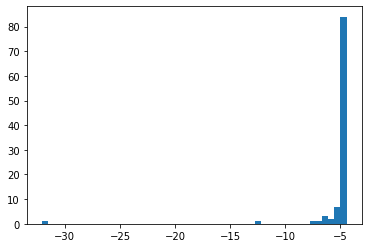

In [643]:
def exercise_10_6(S):
    samples = np.random.standard_t(3, size=S)
    w = stats.norm.pdf(samples) / stats.t.pdf(samples, 3)
    w_new = w / w.sum()
    return samples, w_new

#compute the importance ratios
samples, wnew = exercise_10_6(100)
log_w_new = np.log(wnew)

#plot histogram of the log importance ratio
plot1 = plt.hist(log_w_new, bins=50)

In [435]:
expect = (samples*wnew).sum()/wnew.sum()
print ('E(theta|y):', expect)
var = (samples**2 * wnew).sum() - (expect**2).sum()
print ('var(theta|y):', var)

E(theta|y): 0.09470464095892935
var(theta|y): 1.0483917332167307


E(theta|y): 0.009532266322569134
var(theta|y): 0.9846934981048375


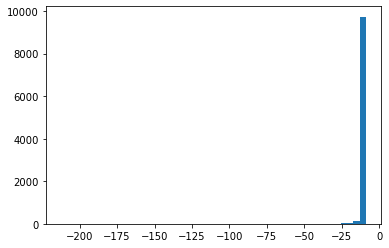

In [436]:
def exercise_10_6(S):
    samples = np.random.standard_t(3, size=S)
    w = stats.norm.pdf(samples) / stats.t.pdf(samples, 3)
    w_new = w / w.sum()
    return samples, w_new

#compute the importance ratios
samples, wnew = exercise_10_6(10000)
log_w_new = np.log(wnew)

#plot histogram of the log importance ratio
plot2 = plt.hist(log_w_new, bins=50)

expect = (samples*wnew).sum()/wnew.sum()
print ('E(theta|y):', expect)
var = (samples**2 * wnew).sum() - (expect**2).sum()
print ('var(theta|y):', var)


In [438]:
print("effective sample size: ", 1/np.sum(wnew**2))

effective sample size:  9224.90369509241


In [9]:
from numpy.random import normal      
import matplotlib.pyplot as plt
%matplotlib inline

def GibbsSampler(theta0, y, k, rho):
    
    theta = [theta0]
    for i in range(k):
        theta2 = theta[-1][1] # theta2 from previous iteration
        theta1 = normal(y[0] + rho*(theta2 - y[1]), 1-rho**2)
        theta.append([theta1, theta2])
        theta2 = normal(y[1] + rho*(theta1 - y[0]), 1-rho**2)
        theta.append([theta1, theta2])
        
    return np.array(theta)
        
# Data as given by Gelman et al. 
y = [0, 0]
rho = 0.8
k = 500

# Four chains starting from four points of a square
theta0_list = [[-2.5, -2.5], [2.5, -2.5], [-2.5, 2.5], [2.5, 2.5]]
data = []
for theta0 in theta0_list:
    data.append(GibbsSampler(theta0, y, k, rho))

data = np.array(data)
print (np.array(data).shape)

(4, 1001, 2)


In [15]:
data[1]

array([[ 2.5       , -2.5       ],
       [-2.18427548, -2.5       ],
       [-2.18427548, -1.12464316],
       ...,
       [ 0.3095792 ,  0.80661153],
       [ 0.42577953,  0.80661153],
       [ 0.42577953,  0.31950442]])

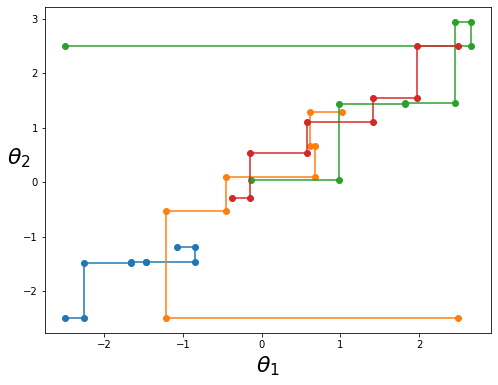

In [6]:
nsteps = 10
for i in range(4):
    plt.plot(data[i, 0:nsteps, 0], data[i, 0:nsteps, 1], "o-")
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()

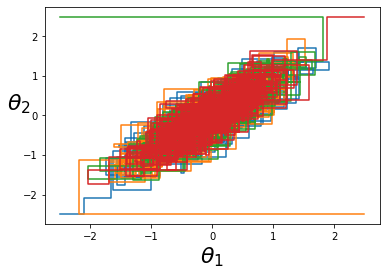

In [18]:
for i in range(4):
    plt.plot(data[i, 0:, 0], data[i, 0:, 1])
    
plt.xlabel(r"$\theta_1$")
plt.ylabel(r"$\theta_2$", rotation="horizontal")

plt.show()